In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("USA_Housing.csv")
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

## We guess house price!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## EDA

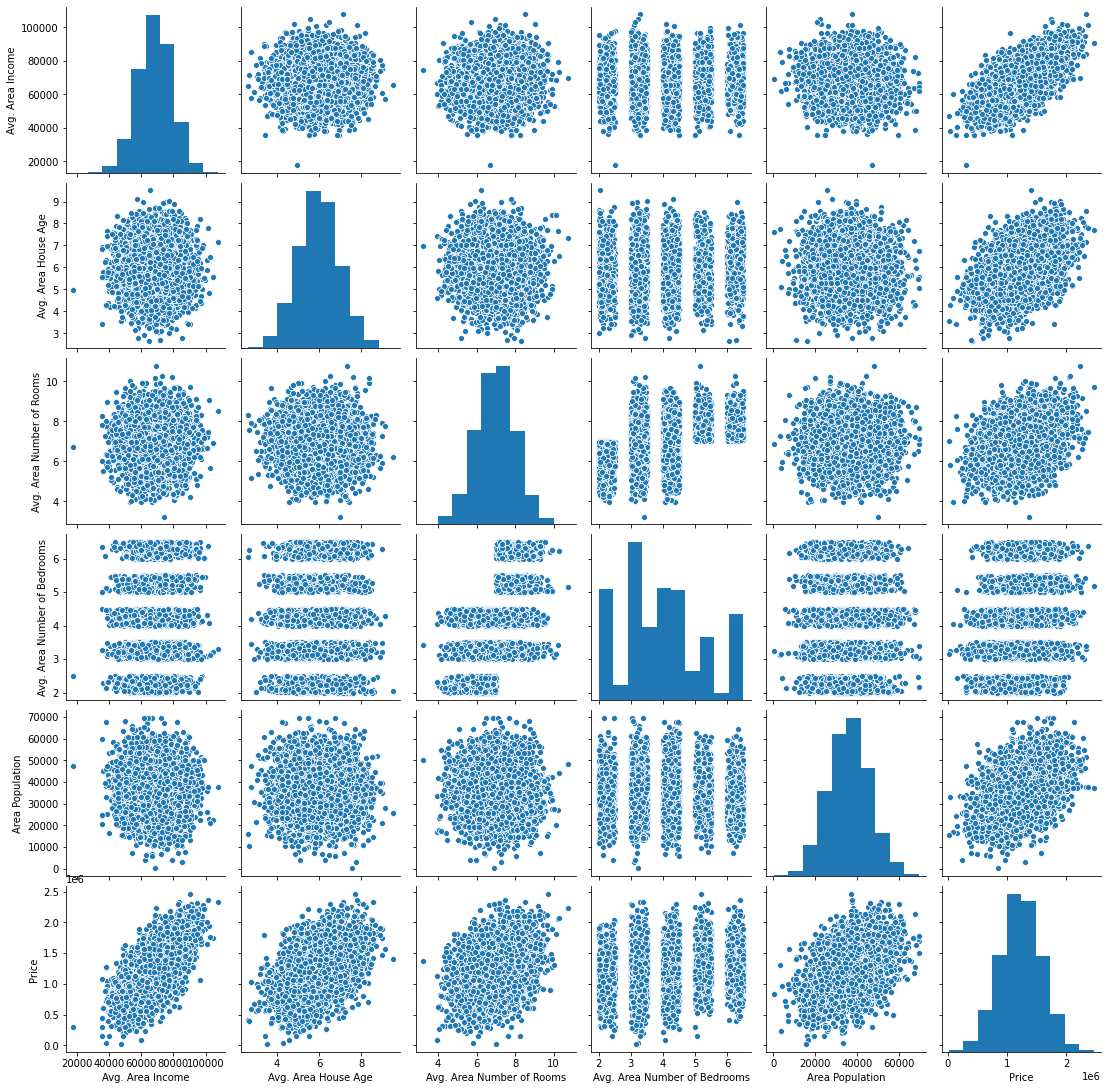

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price'>

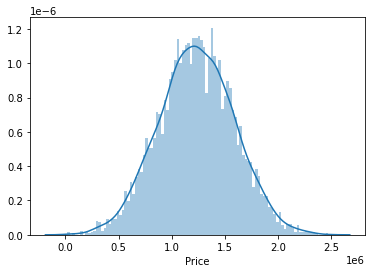

In [12]:
sns.distplot(df["Price"], bins= 100)

<AxesSubplot:>

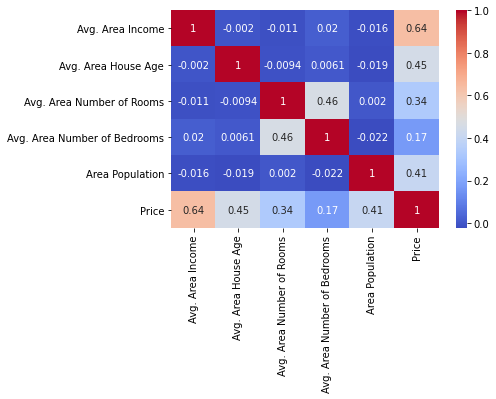

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Training a Linear Regression Model

In [27]:
X = df.drop(["Price", "Address"], axis=1)
y = df['Price']  # dependent Variable

In [28]:
X

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.800503  
1                             3.09     40173.072174  
2                             5.13     36882.159400  
3                             3.26     34310.242831  
4                             4.23     26354.109472  
...                            ...              ...  
4995                          3.46     22837.361035  
4996                          4.02     25616.115489  
4997                          2.13     33266.145490  
4998                          5.44     42625.620156  
4999                          4.07     46501.283803  

[5000 rows x 5 columns]

In [29]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4227      66547.016454             5.846095                   6.847298   
4676      53722.008599             6.401391                   7.787764   
800       64838.492899             6.437157                   8.699544   
3671      67097.092120             6.086754                   7.211963   
4193      75245.465436             8.167820                   7.420100   
...                ...                  ...                        ...   
4426      76223.561256             6.371627                   5.342217   
466       56685.014442             6.958045                   7.502115   
3092      66195.337714             6.507971                   6.611861   
3772      58694.515017             7.394768                   9.269453   
860       61162.580254             5.896316                   7.880521   

      Avg. Area Number of Bedrooms  Area Population  
4227                          4.13     27850.822901  
4676                          3.30     47649.224665  
800                           4.02     32921.010068  
3671                          3.05     27191.506877  
4193                          3.42     37410.669928  
...                            ...              ...  
4426                          2.42     30165.337445  
466                           3.38     43322.166854  
3092                          3.14     37288.923574  
3772                          4.32     49960.977236  
860                           6.04     36033.701431  

[4000 rows x 5 columns]

## Training Model 

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)  # yeni bir model egitilecek bu verilerle

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print(model.score(X,y)*100)  # model score

91.79987716782473


## Model Evaluate

In [40]:
print(model.intercept_)  # b0, x=0, dann y=?

-2635072.900931358


In [41]:
print(model.coef_)  # her bir feature icin bir deger

[2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [43]:
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coeff_df  # indexlerin bir birim degisimlerinin price üzerindeki etkisi

Coefficient
Avg. Area Income                  21.652206
Avg. Area House Age           164666.480722
Avg. Area Number of Rooms     119624.012232
Avg. Area Number of Bedrooms    2440.377611
Area Population                   15.270313

## Prediction

In [44]:
predictions = model.predict(X_test)
predictions

array([1308587.92699716, 1237037.22949393, 1243429.34030719,
       1228900.21360433, 1063320.90710753, 1544058.05034821,
       1094774.70493033,  833284.72339247,  788412.85578753,
       1469714.86615697,  671728.4366209 , 1606818.21977779,
       1004166.61331046, 1796798.97595969, 1288566.96220954,
       1087782.93301085, 1423072.37492492, 1078178.68169648,
        802286.03537916,  930761.03695738, 1134829.86477804,
        916398.42023086, 1489972.69335358, 1284580.15538839,
       1582071.35322689, 1132519.15992001, 1089888.3964449 ,
        974510.51872176,  924057.96820795, 1740759.72092217,
       1286481.59512374, 1621289.95171618, 1435264.20161697,
       1234014.77924526, 1485434.5730037 , 1718335.007536  ,
       1538953.74882765,  777106.64791827, 1765201.52243599,
       1175972.1419983 , 1553707.94323479,  897703.67505166,
       1371049.80326601,  845281.72310351, 1201022.89803858,
       1133285.98450794, 1363128.14557392, 1449814.08768222,
       1574363.90467325,

In [47]:
X_test["prediction"] = predictions

C:\Users\aliyi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
X_test

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1501      61907.593345             7.017838                   6.440256   
2586      57160.202243             6.893260                   6.921532   
2653      70190.796445             6.745054                   6.662567   
1055      69316.796889             6.300409                   7.873576   
705       72991.481649             3.412866                   6.494081   
...                ...                  ...                        ...   
4711      77267.656264             3.939501                   8.342808   
2313      75967.135085             5.939370                   6.111658   
3214      81013.615294             7.149797                   7.239105   
2732      86762.882864             6.530193                   5.106962   
1926      67071.830617             4.935155                   7.632398   

      Avg. Area Number of Bedrooms  Area Population    prediction  
1501                          3.25     43828.947207  1.308588e+06  
2586                          3.13     43467.147035  1.237037e+06  
2653                          2.01     29215.136112  1.243429e+06  
1055                          4.28     24448.211461  1.228900e+06  
705                           2.48     50626.495426  1.063321e+06  
...                            ...              ...           ...  
4711                          6.09     22487.712072  1.042903e+06  
2313                          2.32     38897.091584  1.318532e+06  
3214                          5.44     45472.049451  1.870001e+06  
2732                          2.09     47724.581355  1.663624e+06  
1926                          5.04     32084.743400  1.045097e+06  

[1000 rows x 6 columns]

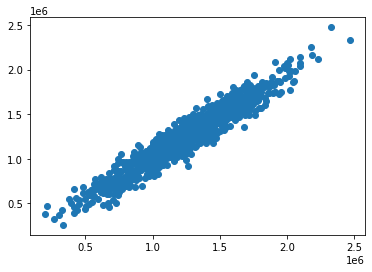

In [53]:
plt.scatter(y_test, predictions)

<AxesSubplot:xlabel='Price'>

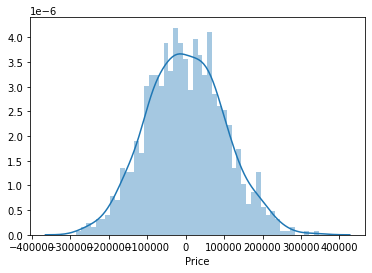

In [55]:
sns.distplot((y_test-predictions), bins=50)  # residuel evaluation

## Evaluation Metrics

Case 1: Actual Values = [2,4,6,8] , Predicted Values = [4,6,8,10]
Case 2: Actual Values = [2,4,6,8] , Predicted Values = [4,6,8,12]
    
MAE for case 1 = 2.0, RMSE for case 1 = 2.0, MAE for case 2 = 2.5, RMSE for case 2 = 2.65

In [56]:
from sklearn import metrics

In [61]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))  # genel olarak RMSE populer

MAE:  80879.09723487175
MSE:  10089009300.890957
RMSE:  100444.06055556973
